In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.stats import iqr
from scipy.stats import wilcoxon

%matplotlib inline

In [2]:
results_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/classification/consonant_vowel_vsmc.h5')

In [3]:
results = h5py.File(results_path, 'r')

In [4]:
consonant = results['c_unshared_log_test']
vowel = results['v_unshared_log_test']

In [5]:
uoi_c_coefs = np.median(consonant['uoi/coefs'], axis=0)
uoi_v_coefs = np.median(vowel['uoi/coefs'], axis=0)
log_c_coefs = np.median(consonant['logistic/coefs'], axis=0)
log_v_coefs = np.median(vowel['logistic/coefs'], axis=0)

In [6]:
n_total_electrodes = 256
grid_size = int(np.sqrt(n_total_electrodes))
included_electrode_idx = [
    56, 61, 62, 63, 71, 72, 73, 74, 75, 76,
    77, 78, 79, 87, 88, 89, 90, 91, 92, 93,
    94, 95, 102, 103, 104, 105, 106, 107, 108,
    109, 110, 111, 117, 118, 119, 120, 121, 122,
    124, 125, 126, 133, 134, 135, 136, 137, 138,
    139, 140, 141, 142, 143, 149, 150, 151, 152,
    153, 154, 155, 156, 157, 158, 159, 164, 165,
    166, 167, 168, 169, 170, 171, 172, 173, 174,
    175, 181, 182, 183, 184, 185, 186, 187, 188,
    200, 201, 202
]
unincluded_electrode_idx = np.setdiff1d(np.arange(n_total_electrodes), included_electrode_idx)

In [7]:
included_mask = np.zeros(n_total_electrodes)
included_mask[included_electrode_idx] = 1
included_mask = included_mask.reshape((grid_size, grid_size))

unincluded_mask = np.zeros(n_total_electrodes)
unincluded_mask[unincluded_electrode_idx] = 1
unincluded_mask = unincluded_mask.reshape((grid_size, grid_size))

In [8]:
uoi_grid_b = -20 * np.ones(n_total_electrodes)
b_coefs = np.copy(uoi_c_coefs[0])
b_coefs[b_coefs < 0] = 0
uoi_grid_b[included_electrode_idx] = b_coefs
uoi_grid_b = uoi_grid_b.reshape((grid_size, grid_size))

In [9]:
log_grid_b = -20 * np.ones(n_total_electrodes)
b_coefs = np.copy(log_c_coefs[0])
b_coefs[b_coefs < 0] = 0
log_grid_b[included_electrode_idx] = b_coefs
log_grid_b = log_grid_b.reshape((grid_size, grid_size))

In [10]:
uoi_grid_d = -20 * np.ones(n_total_electrodes)
d_coefs = np.copy(uoi_c_coefs[1])
d_coefs[d_coefs < 0] = 0
uoi_grid_d[included_electrode_idx] = d_coefs
uoi_grid_d = uoi_grid_d.reshape((grid_size, grid_size))

In [11]:
log_grid_d = -20 * np.ones(n_total_electrodes)
d_coefs = np.copy(log_c_coefs[1])
d_coefs[d_coefs < 0] = 0
log_grid_d[included_electrode_idx] = d_coefs
log_grid_d = log_grid_d.reshape((grid_size, grid_size))

In [12]:
uoi_grid_f = -20 * np.ones(n_total_electrodes)
f_coefs = np.copy(uoi_c_coefs[2])
f_coefs[f_coefs < 0] = 0
uoi_grid_f[included_electrode_idx] = f_coefs
uoi_grid_f = uoi_grid_f.reshape((grid_size, grid_size))

In [13]:
log_grid_f = -20 * np.ones(n_total_electrodes)
f_coefs = np.copy(log_c_coefs[2])
f_coefs[f_coefs < 0] = 0
log_grid_f[included_electrode_idx] = f_coefs
log_grid_f = log_grid_f.reshape((grid_size, grid_size))

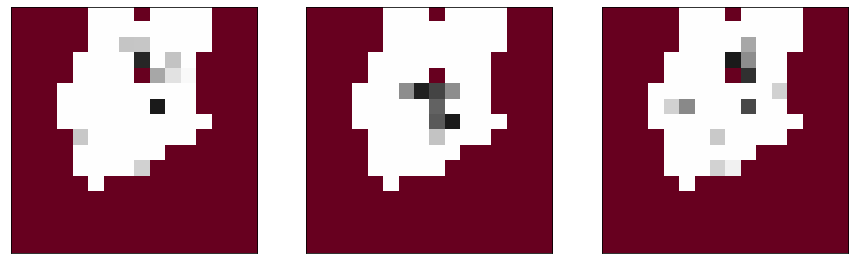

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(np.flip(uoi_grid_b.T, axis=(0, 1)),
          vmin=-uoi_grid_b.max(), vmax=uoi_grid_b.max(),
          cmap=plt.get_cmap('RdGy'))

axes[1].imshow(np.flip(uoi_grid_d.T, axis=(0, 1)),
          vmin=-uoi_grid_d.max(), vmax=uoi_grid_d.max(),
          cmap=plt.get_cmap('RdGy'))

axes[2].imshow(np.flip(uoi_grid_f.T, axis=(0, 1)),
          vmin=-uoi_grid_f.max(), vmax=uoi_grid_f.max(),
          cmap=plt.get_cmap('RdGy'))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

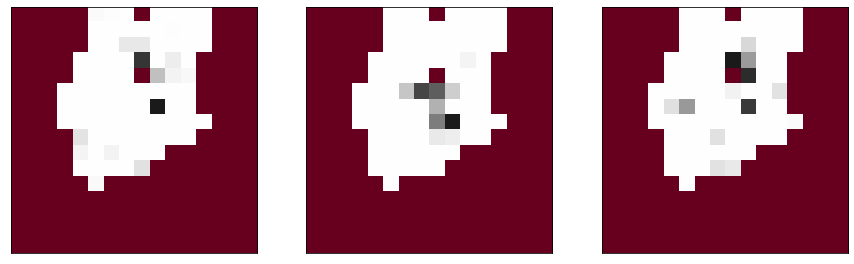

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(np.flip(log_grid_b.T, axis=(0, 1)),
          vmin=-log_grid_b.max(), vmax=log_grid_b.max(),
          cmap=plt.get_cmap('RdGy'))

axes[1].imshow(np.flip(log_grid_d.T, axis=(0, 1)),
          vmin=-log_grid_d.max(), vmax=log_grid_d.max(),
          cmap=plt.get_cmap('RdGy'))

axes[2].imshow(np.flip(log_grid_f.T, axis=(0, 1)),
          vmin=-log_grid_f.max(), vmax=log_grid_f.max(),
          cmap=plt.get_cmap('RdGy'))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])